In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from statistics import mode
#import graphviz 
#from sklearn.tree import export_graphviz
#from sklearn import tree
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
wine=pd.read_csv("C:\\Users\\user\\Downloads\\Wine_data.csv")

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [7]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


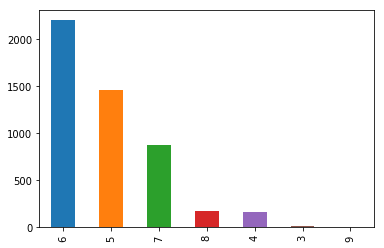

In [8]:
wine.quality.value_counts().plot(kind='bar')
plt.show()
# quality-(6) group is the highest count and quality-(9) is the least

# "question-1"#•	What can you comment on the variables?


In [ ]:
ans:(1) there are various features or independent variables are provided to predict the quality of wine 
       in that quality(6),count is more,
        where as quality(9) has the least count.
        

# "question-2"#Do we need to do outlier treatment? What is the most apt method for this?

ans-(1) yes,we do require an outlier treatment because they are affecting the accuracy of the model ,
    i have run the model without doing outlier treatment then there was an large difference between
    train accuracy and test accuracy.
    (2)so, i have done outlier treatment on '8 features' -("fixed acidity","reidual sugar",
    "free sulfur dioxide","total sulfur dioxide","volatile acidity","citric acid","chlorides",'sulphates')
    (3)i have adopted capping and flooring method, by giving 99 percentile values to the extreme values
       i.e(as per a condition we can give outlier treatment by 95-99 percentile,or mean even but
            we consider the mean we will lose the data given by the client so,as per my knowledge and 
            faculty teaches us about this type of treatment i have adopted.)

In [11]:
#Getting percentile distribution for all numeric variables
wine.quantile([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0.01,5.0,0.12,0.05,0.9,0.020,6.0,50.97,0.988779,2.88,0.29,8.7,4.0
0.05,5.6,0.15,0.17,1.1,0.027,11.0,75.00,0.989638,2.96,0.34,8.9,5.0
0.10,5.9,0.17,0.22,1.2,0.030,15.0,87.00,0.990327,3.00,0.36,9.0,5.0
0.25,6.3,0.21,0.27,1.7,0.036,23.0,108.00,0.991723,3.09,0.41,9.5,5.0
0.50,6.8,0.26,0.32,5.2,0.043,34.0,134.00,0.993740,3.18,0.47,10.4,6.0
0.75,7.3,0.32,0.39,9.9,0.050,46.0,167.00,0.996100,3.28,0.55,11.4,6.0
0.90,7.9,0.40,0.49,14.0,0.058,57.0,195.00,0.998150,3.38,0.64,12.4,7.0
0.95,8.3,0.46,0.54,15.7,0.067,63.0,212.00,0.999000,3.46,0.71,12.7,7.0
0.99,9.2,0.63,0.74,18.8,0.160,81.0,241.03,1.000302,3.60,0.83,13.4,8.0
1.00,14.2,1.10,1.66,65.8,0.346,289.0,440.00,1.038980,3.82,1.08,14.2,9.0


In [12]:
#while oberserving the percentile we gotta known that there are outliers in ,"fixed acidity",
#"reidual sugar","free sulfur dioxide","total sulfur dioxide","volatile acidity","citric acid","chlorides",'sulphates'

In [13]:
#by using box plot let us confirm it


<function matplotlib.pyplot.show(*args, **kw)>

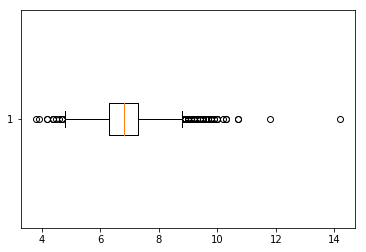

In [14]:
plt.boxplot(wine["fixed acidity"],vert=False)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

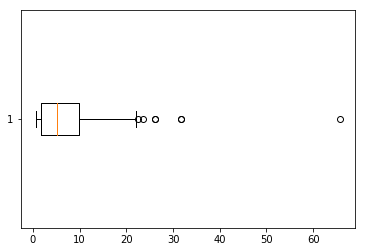

In [15]:
plt.boxplot(wine["residual sugar"],vert=False)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

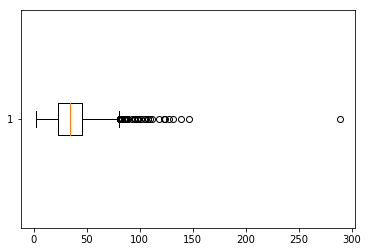

In [16]:
plt.boxplot(wine["free sulfur dioxide"],vert=False)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

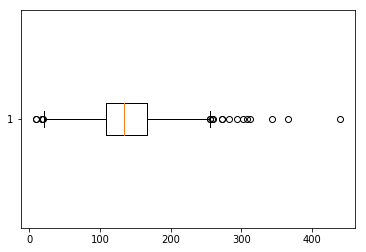

In [17]:
plt.boxplot(wine["total sulfur dioxide"],vert=False)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

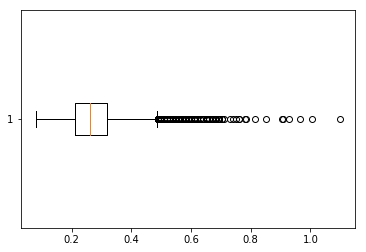

In [18]:
plt.boxplot(wine["volatile acidity"],vert=False)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

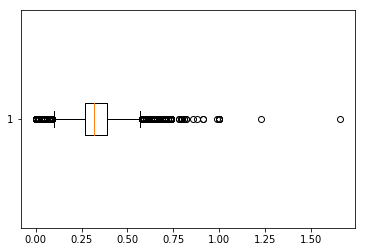

In [19]:
plt.boxplot(wine["citric acid"],vert=False)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

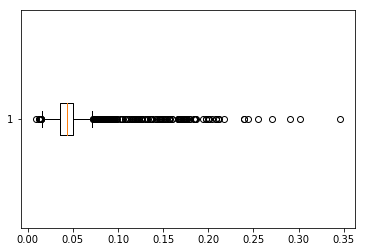

In [20]:
plt.boxplot(wine["chlorides"],vert=False)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

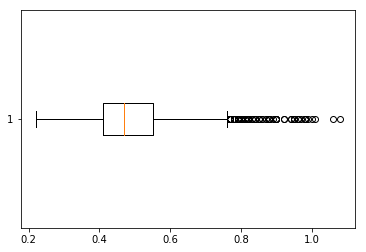

In [21]:
plt.boxplot(wine["sulphates"],vert=False)
plt.show

# Capping and Flooring(outliers treatment)

In [22]:

wine['fixed acidity']=wine["fixed acidity"].map(lambda x:9.2 if x>9.2
     else x)

In [23]:
wine['residual sugar']=wine["residual sugar"].map(lambda x:18.8 if x>18.8
     else x)

In [24]:
wine['chlorides']=wine["chlorides"].map(lambda x:0.160 if x>0.160
     else x)

In [25]:
wine['citric acid']=wine["citric acid"].map(lambda x:0.74 if x>0.74
     else x)

In [26]:
wine['free sulfur dioxide']=wine["free sulfur dioxide"].map(lambda x:81 if x>81
     else x)

In [27]:
wine['total sulfur dioxide']=wine["total sulfur dioxide"].map(lambda x:241.03 if x>241.03
     else x)

In [28]:
wine['volatile acidity']=wine["volatile acidity"].map(lambda x:0.63 if x>0.63
     else x)

In [29]:
wine['sulphates']=wine["sulphates"].map(lambda x:0.63 if x>0.63
     else x)

In [30]:
#Getting percentile distribution for all numeric variables
wine.quantile([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0.01,5.0,0.12,0.05,0.9,0.020,6.0,50.9700,0.988779,2.88,0.29,8.7,4.0
0.05,5.6,0.15,0.17,1.1,0.027,11.0,75.0000,0.989638,2.96,0.34,8.9,5.0
0.10,5.9,0.17,0.22,1.2,0.030,15.0,87.0000,0.990327,3.00,0.36,9.0,5.0
0.25,6.3,0.21,0.27,1.7,0.036,23.0,108.0000,0.991723,3.09,0.41,9.5,5.0
0.50,6.8,0.26,0.32,5.2,0.043,34.0,134.0000,0.993740,3.18,0.47,10.4,6.0
0.75,7.3,0.32,0.39,9.9,0.050,46.0,167.0000,0.996100,3.28,0.55,11.4,6.0
0.90,7.9,0.40,0.49,14.0,0.058,57.0,195.0000,0.998150,3.38,0.63,12.4,7.0
0.95,8.3,0.46,0.54,15.7,0.067,63.0,212.0000,0.999000,3.46,0.63,12.7,7.0
0.99,9.2,0.63,0.74,18.8,0.160,81.0,241.0009,1.000302,3.60,0.63,13.4,8.0
1.00,9.2,0.63,0.74,18.8,0.160,81.0,241.0300,1.038980,3.82,0.63,14.2,9.0


# Data Preparation( Splitting the Dependent/Target Variable and the Independent Variables )

In [31]:
x= wine.drop('quality',axis=1)
y= wine['quality']

In [32]:
x.shape


(4898, 11)

In [33]:
y.shape

(4898,)

In [34]:
from sklearn.cross_validation import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [35]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_test = independent_scalar.transform (x_test) # only transform

# SUPPORT VECTOR Classifier

In [80]:
from sklearn.svm import SVC 
#Support Vector Classifier is the corresponding Classifier
support= SVC(kernel='rbf',random_state=seed)
support.fit (x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=7, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
predictValues_train = support.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_test = support.predict(x_test)
#print(predictValues_validate)
accuracy_test=accuracy_score(y_test, predictValues_test)

print("Train Accuracy  :: ",accuracy_train)
print("test Accuracy  :: ",accuracy_test)

Train Accuracy  ::  0.5341306884480747
test Accuracy  ::  0.5204081632653061


In [82]:
from sklearn import metrics
cr= metrics.classification_report(y_train, predictValues_train)
print(cr)

             precision    recall  f1-score   support

          3       0.00      0.00      0.00        11
          4       0.64      0.08      0.15       109
          5       0.61      0.47      0.53      1017
          6       0.51      0.84      0.63      1540
          7       0.55      0.08      0.14       627
          8       0.00      0.00      0.00       121
          9       0.00      0.00      0.00         3

avg / total       0.53      0.53      0.47      3428



E:\installed anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [83]:
cr= metrics.classification_report(y_test, predictValues_test)
print(cr)

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.33      0.04      0.07        54
          5       0.56      0.44      0.49       440
          6       0.51      0.83      0.63       658
          7       0.60      0.10      0.17       253
          8       0.00      0.00      0.00        54
          9       0.00      0.00      0.00         2

avg / total       0.51      0.52      0.46      1470



E:\installed anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = support, X = x_train, y = y_train, cv = 5)
accuracies.mean()


E:\installed anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.5087447323257855

In [85]:
accuracies.std()

0.01168414931561899

# Iteration2- By Droping few variables

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIFFN(X):
    data_mat = X.as_matrix()
    vif = [variance_inflation_factor(data_mat, i) for i in range(data_mat.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['columns'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [57]:
VIFFN(x)

E:\installed anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,columns,vif
0,fixed acidity,98.536640
1,volatile acidity,10.500639
2,citric acid,10.705650
3,residual sugar,4.036318
4,chlorides,8.395583
5,free sulfur dioxide,10.317836
6,total sulfur dioxide,26.186677
7,density,1094.972080
8,pH,613.901073
9,sulphates,30.142967


In [58]:
wine1=x

In [59]:
wine1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,18.8,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [60]:

wine1.drop('density',axis=1,inplace=True)
VIFFN(wine1)

E:\installed anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,columns,vif
0,fixed acidity,61.756239
1,volatile acidity,10.422860
2,citric acid,10.700832
3,residual sugar,3.600104
4,chlorides,7.791151
5,free sulfur dioxide,10.249453
6,total sulfur dioxide,26.183825
7,pH,172.035581
8,sulphates,30.090984
9,alcohol,106.570026


In [61]:

wine1.drop('pH',axis=1,inplace=True)
VIFFN(wine1)

E:\installed anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,columns,vif
0,fixed acidity,58.373875
1,volatile acidity,10.422567
2,citric acid,10.647484
3,residual sugar,3.538542
4,chlorides,7.164976
5,free sulfur dioxide,10.242419
6,total sulfur dioxide,24.779915
7,sulphates,26.850128
8,alcohol,49.171117


In [62]:
wine1.drop('fixed acidity',axis=1,inplace=True)
VIFFN(wine1)

E:\installed anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,columns,vif
0,volatile acidity,10.418891
1,citric acid,9.597836
2,residual sugar,3.393139
3,chlorides,6.918776
4,free sulfur dioxide,10.044564
5,total sulfur dioxide,23.350211
6,sulphates,26.433815
7,alcohol,29.596790


In [63]:
wine1.drop('alcohol',axis=1,inplace=True)
VIFFN(wine1)

E:\installed anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,columns,vif
0,volatile acidity,8.020547
1,citric acid,8.469349
2,residual sugar,3.279406
3,chlorides,6.910044
4,free sulfur dioxide,9.750734
5,total sulfur dioxide,23.172838
6,sulphates,16.597677


In [64]:
wine1.drop('total sulfur dioxide',axis=1,inplace=True)
VIFFN(wine1)

E:\installed anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,columns,vif
0,volatile acidity,7.566569
1,citric acid,8.398188
2,residual sugar,3.033738
3,chlorides,6.705092
4,free sulfur dioxide,6.380034
5,sulphates,15.026320


In [65]:
wine1.drop('sulphates',axis=1,inplace=True)
VIFFN(wine1)

E:\installed anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,columns,vif
0,volatile acidity,5.757639
1,citric acid,6.705479
2,residual sugar,3.030720
3,chlorides,6.357261
4,free sulfur dioxide,5.825337


# Data Preparation( Splitting the Dependent/Target Variable and the Independent Variables )

In [66]:
x= wine1
y= wine['quality']

In [67]:
x.shape


(4898, 5)

In [68]:
y.shape

(4898,)

In [69]:
from sklearn.cross_validation import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [70]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_test = independent_scalar.transform (x_test) # only transform

# SUPPORT VECTOR Classifier

In [71]:
from sklearn.svm import SVC 
#Support Vector Classifier is the corresponding Classifier
svc= SVC(kernel='rbf',random_state=seed)
svc.fit (x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=7, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
predictValues_train =svc.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_test = svc.predict(x_test)
#print(predictValues_validate)
accuracy_test=accuracy_score(y_test, predictValues_test)

print("Train Accuracy  :: ",accuracy_train)
print("test Accuracy  :: ",accuracy_test)

Train Accuracy  ::  0.5341306884480747
test Accuracy  ::  0.5204081632653061


In [73]:
from sklearn import metrics
cr= metrics.classification_report(y_train, predictValues_train)
print(cr)

             precision    recall  f1-score   support

          3       0.00      0.00      0.00        11
          4       0.64      0.08      0.15       109
          5       0.61      0.47      0.53      1017
          6       0.51      0.84      0.63      1540
          7       0.55      0.08      0.14       627
          8       0.00      0.00      0.00       121
          9       0.00      0.00      0.00         3

avg / total       0.53      0.53      0.47      3428



E:\installed anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
cr= metrics.classification_report(y_test, predictValues_test)
print(cr)

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.33      0.04      0.07        54
          5       0.56      0.44      0.49       440
          6       0.51      0.83      0.63       658
          7       0.60      0.10      0.17       253
          8       0.00      0.00      0.00        54
          9       0.00      0.00      0.00         2

avg / total       0.51      0.52      0.46      1470



E:\installed anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svc, X = x_train, y = y_train, cv = 5)
accuracies.mean()




E:\installed anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.5087447323257855

In [76]:
accuracies.std()

0.01168414931561899